### Домашнее задание

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Для домашнего задания вы используете другой датасет.

In [17]:
data = pd.read_csv('https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data', sep='\t')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [18]:
#улучшения для data:
data_real = data
target = 'Y'
r_X = data_real.drop([target], axis=1)
r_y = data_real[target]

for name in data.columns[:-1]:
    row = data[name]
    data[name] = (row - row.mean()) / row.std()
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569,151
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285,75
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537,141
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600,206
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458,135
5,-1.946605,-0.937474,-0.854615,-0.408278,-1.448804,-1.665045,0.866813,-1.604285,-0.864700,-2.023269,97
6,-0.954922,1.064282,-0.990419,-0.335978,-0.842008,-0.520800,0.016355,-0.829361,-1.321254,-0.805490,138
7,1.333577,1.064282,-0.039789,1.399218,1.903018,2.287202,0.480241,0.371770,-0.752140,0.064353,63
8,0.875877,1.064282,1.295620,-0.842078,-0.293003,0.130235,-0.602160,-0.054438,-0.314154,0.238321,110
9,-1.488905,-0.937474,0.820305,-0.697478,-0.264108,-0.724660,-0.524846,-0.054438,1.422478,-0.283584,310


В датасете приводится информация о пациентах и их состоянии при заболевании диабетом. Описание признаков можно прочитать [здесь](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Колонка Y - целевая переменная:

In [19]:
target = 'Y'
X = data.drop([target], axis=1)
y = data[target]

X.shape, y.shape

((442, 10), (442,))

Ваша задача - провести то же исследование, что и в датасете в самом начале (Sales ~ TV, Radio, Newspaper). В итоге, нужно получить модель линейной регрессии, качество которой надо вывести с помощью cross_val_score с метрикой MSE (тоже самое в общем).

In [20]:
#OK... let's try
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
#L1
lambdas = np.arange(-10.0, 1.0, 0.1)

# Лямбды и их ошибки на обучающей выборке
lambda_errors = []
for val in lambdas:
    errors = -cross_val_score(Lasso(), X, y, cv=13, scoring='neg_mean_squared_error')
    lambda_errors.append((val,np.average(errors)))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])

# Вычислим ошибку на кросс-валидации
# Лучшая модель
best_reg = Lasso(alpha=val)
cv_error = -np.average(cross_val_score(best_reg, r_X, r_y, cv=13, scoring='neg_mean_squared_error'))

print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, cv_error))


Оптимальная lambda:
Lambda=-10.00, результат=3050.93


In [21]:
# first try with LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


reg = LinearRegression()

# Обучаем нашу модель
reg.fit(X, y)

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
    
y_pred = reg.predict(X)

# Ошибка теперь равна:
print(mean_squared_error(y_pred, y))
print(-np.average(cross_val_score(best_reg, r_X, r_y, cv=13, scoring='neg_mean_squared_error')))

Сдвиг=152.13348416289597
Коэффициент для AGE=-0.47666029999097626
Коэффициент для SEX=-11.41979255582966
Коэффициент для BMI=24.75456762164097
Коэффициент для BP=15.446887881063015
Коэффициент для S1=-37.72264945486815
Коэффициент для S2=22.701858143107533
Коэффициент для S3=4.811584187525443
Коэффициент для S4=8.431582746254564
Коэффициент для S5=35.774938074147784
Коэффициент для S6=3.2203186754144983
2859.6963475867506
3050.931349575696


In [22]:
from sklearn.linear_model import Ridge

reg = Ridge().fit(X, y)

# Посмотрим на коэффициенты модели
# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
print()

errors = -cross_val_score(Ridge(), X, y, cv=5, scoring='neg_mean_squared_error')
print("Результат={}".format(np.average(errors)))

Сдвиг=152.133484162896
Коэффициент для AGE=-0.43157588052422796
Коэффициент для SEX=-11.346350158161796
Коэффициент для BMI=24.799370779356007
Коэффициент для BP=15.390782582767693
Коэффициент для S1=-30.108867758579805
Коэффициент для S2=16.661213348019857
Коэффициент для S3=1.4577828449278558
Коэффициент для S4=7.528044289717317
Коэффициент для S5=32.87575059524552
Коэффициент для S6=3.270185528175352

Результат=2993.642234155842


In [23]:
#Можно заметить, что коэффицент при AGE очень маленький...можно попытаться удалить его
def linearRegression(X,y,r_X,r_y):
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)
    return(mean_squared_error(y_pred, y))
delete_columns = []
for i in X.columns:
    delete_columns.append(linearRegression(X.drop([i], axis=1),y,r_X,r_y))
print(delete_columns)
#наверное, все-таки нужно выкинуть AGE...
X=X.drop(['AGE'],axis = 1)

[2859.882571023872, 2961.503376648679, 3264.749401883803, 3022.8195356541646, 2883.6780812251923, 2872.8161267269606, 2861.1960703385307, 2867.674174122114, 2986.4286600140017, 2866.665788680964]


In [24]:
reg = LinearRegression()
reg.fit(X, y)
print("Сдвиг={}".format(reg.intercept_))
for column, coef in zip(X.columns, reg.coef_):
    print("Коэффициент для {}={}".format(column, coef))
y_pred = reg.predict(X)
print(mean_squared_error(y_pred, y))
print(-np.average(cross_val_score(best_reg, r_X, r_y, cv=13, scoring='neg_mean_squared_error')))

Сдвиг=152.13348416289597
Коэффициент для SEX=-11.468137435754695
Коэффициент для BMI=24.757649533428697
Коэффициент для BP=15.347640615510253
Коэффициент для S1=-37.66134571133467
Коэффициент для S2=22.589117392609534
Коэффициент для S3=4.748413613789801
Коэффициент для S4=8.45034379048871
Коэффициент для S5=35.69051844625267
Коэффициент для S6=3.151013961656396
2859.882571023872
3050.931349575696


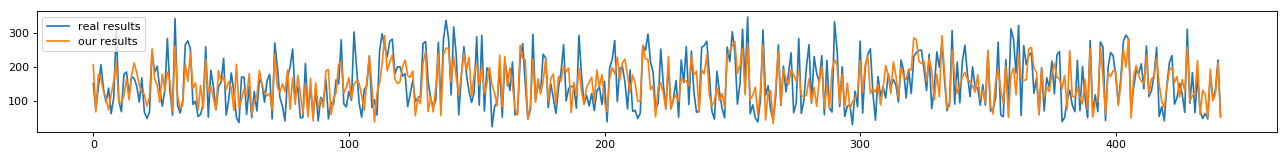

In [25]:
plt.figure(num=None, figsize=(20, 2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(0,len(y),1), y, label='real results')
plt.plot(np.arange(0,len(y),1), reg.predict(X), label='our results')
plt.legend()
plt.show()

#i don't know how near should it be, but at least not so different...

За каждое достойное улучшение качества на cross_val_score будут доп. баллы. Не забудьте описать, что использовали, что получилось и нет, а также попробуйте понять почему. Побольше гуглите. 

Возможные улучшения:
* Нормализация данных: вычитаем из каждой колонки её среднее и делим на её дисперсию.
* Пробуйте убрать ненужные признаки.
* Можно перемножать некоторые признаки.
* Погуглите что-то вроде "improve linear regression".

В общем, представьте, что вы работаете датасаентистом, получаете 300к долларов, а вам сказали, что нужно как можно лучше уметь предсказывать такие данные.